## Import Library

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [129]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [130]:
# rename the Luas Tanah (m2), Luas Bangunan (m2), Harga Penawaran (dari Owner), Lebar Jalan Depan Rumah (ROW) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)" : "Luas Bangunan", "Harga Penawaran (dari Owner)": "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [131]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [132]:
# Get statistical info from dataset
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [133]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [134]:
# Drop Terjual/Belum as it's has only one value.
df = df.drop(columns=['Terjual/Belum'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Arah Hadap Rumah         308 non-null    object
 9   Posisi Rumah             308 non-null    object
 10  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(5)
memory usage: 26.6+ KB


In [135]:
# check duplicates column
df[df.duplicated(keep=False)]

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
13,Standard,Gubeng,104,215,4,4,2,1350000000,Timur,Standard,1-2 Mobil
14,Standard,Gubeng,104,215,4,4,2,1350000000,Timur,Standard,1-2 Mobil
98,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Utara,Standard,> 2 Mobil
110,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Utara,Standard,> 2 Mobil
257,Premium,Citraland,210,325,6,5,2,4250000000,Selatan,Standard,> 2 Mobil
282,Premium,Citraland,210,325,6,5,2,4250000000,Selatan,Standard,> 2 Mobil


In [136]:
# delete the duplicate column, only keep one
df = df.drop_duplicates(keep='first')

# Exploratory Data Analysis


/tmp/ipython-input-1280093617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Area Category', palette='viridis')


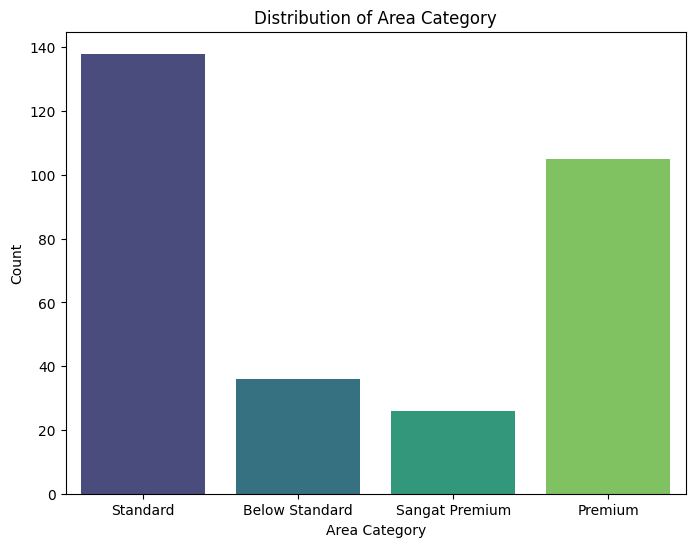

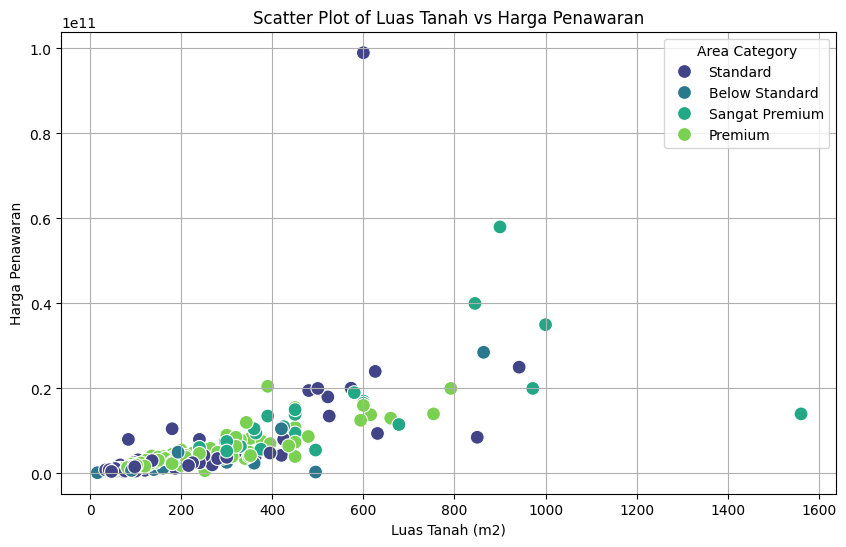

In [137]:
# Visualization 1: Distribution of 'Area Category'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Area Category', palette='viridis')
plt.title('Distribution of Area Category')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.show()

# Visualization 2: Scatter plot of 'Luas Tanah' vs 'Harga Penawaran'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas Tanah', y='Harga Penawaran', hue='Area Category', palette='viridis', s=100)
plt.title('Scatter Plot of Luas Tanah vs Harga Penawaran')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran')
plt.grid(True)
plt.show()

**Interpretation of Visualization 1: Distribution of Area Category**

This bar plot shows the count of properties within each 'Area Category'. It allows us to see the distribution of properties across different categories (e.g., Standard, Below Standard, Sangat Premium, Premium). This helps understand the composition of the dataset in terms of property categories.

**Interpretation of Visualization 2: Scatter Plot of Luas Tanah vs Harga Penawaran**

This scatter plot visualizes the relationship between 'Luas Tanah' (land area) and 'Harga Penawaran' (offered price), with points colored by 'Area Category'. We can observe how the price of a property relates to its land area, and if there are any clear patterns or clusters based on the 'Area Category'. Generally, we might expect to see a positive correlation between land area and price, and potentially distinct groupings for different area categories.

## Data Transformation

In [138]:
from sklearn.preprocessing import LabelEncoder

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

# Perform nominal encoding on appropriate categorical columns
df_nominal_encoded = df.copy()
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    # Check if the column has only two unique values for binary encoding, otherwise use LabelEncoder
    if df_nominal_encoded[col].nunique() == 2:
        df_nominal_encoded[col] = le.fit_transform(df_nominal_encoded[col])
    else:
        # For columns with more than two unique values, LabelEncoder might imply ordinality which is not desired for nominal data.
        # However, based on the original request to use "nominal encoding" for clustering, LabelEncoder is a common approach
        # for multi-class nominal data in clustering, despite the potential issue of implied ordinality.
        df_nominal_encoded[col] = le.fit_transform(df_nominal_encoded[col])


display(df_nominal_encoded.head())

Categorical columns: ['Area Category', 'Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']
Numerical columns: ['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']


,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,3,2,0
1,0,100,30,60,2,1,2,287799000,3,2,1
2,3,48,170,170,5,4,2,2699999999,1,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,2,0


In [139]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = categorical_cols

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar Mandi','Tingkat/Lantai ', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar Mandi','Tingkat/Lantai ', 'Harga Penawaran' ])
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.060732,0.154902,-0.205482,0.315414,-0.184628
1,-0.977403,-0.967754,-1.434347,0.315414,-0.570059
2,-0.285313,-0.453203,0.408950,0.315414,-0.280620
3,-0.201273,-0.078985,1.023383,0.315414,-0.232624
4,0.604517,1.558222,1.023383,0.315414,-0.004644


In [140]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02
mean,-2.329648e-17,4.076885e-17,8.736181e-17,1.164824e-17,5.096106e-17
std,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00
min,-1.056499e+00,-1.182930e+00,-1.434347e+00,-1.647879e+00,-5.853933e-01
25%,-6.511317e-01,-6.870902e-01,-8.199149e-01,3.154143e-01,-4.366063e-01
50%,-3.199173e-01,-3.128714e-01,-2.054824e-01,3.154143e-01,-2.806200e-01
75%,3.177940e-01,3.420114e-01,4.089502e-01,3.154143e-01,-1.664307e-02
max,6.591094e+00,4.364863e+00,5.938843e+00,4.242001e+00,1.127437e+01


In [141]:
# Merge the scaled numerical data with the nominal encoded categorical data
# Ensure that the indices are aligned before merging
df_merged = pd.concat([df_scaled, df_nominal_encoded[categorical_cols]], axis=1)

display(df_merged.head())

,Luas Tanah,Luas Bangunan,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,0.060732,0.154902,-0.205482,0.315414,-0.184628,3.0,11.0,3.0,2.0,0.0
1,-0.977403,-0.967754,-1.434347,0.315414,-0.570059,0.0,100.0,3.0,2.0,1.0
2,-0.285313,-0.453203,0.408950,0.315414,-0.280620,3.0,48.0,1.0,0.0,0.0
3,-0.201273,-0.078985,1.023383,0.315414,-0.232624,2.0,48.0,3.0,2.0,0.0
4,0.604517,1.558222,1.023383,0.315414,-0.004644,1.0,48.0,0.0,2.0,0.0


## Silhouette Score

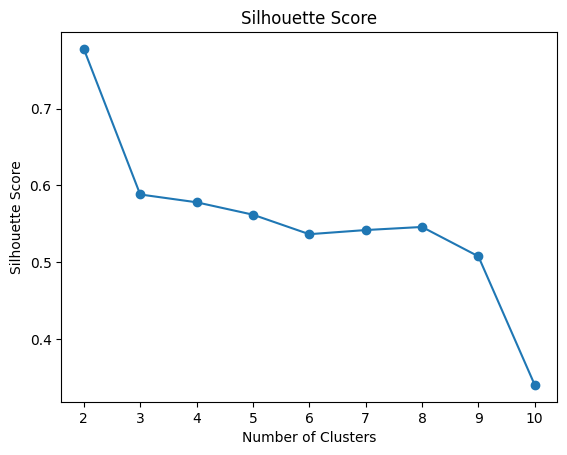

In [142]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


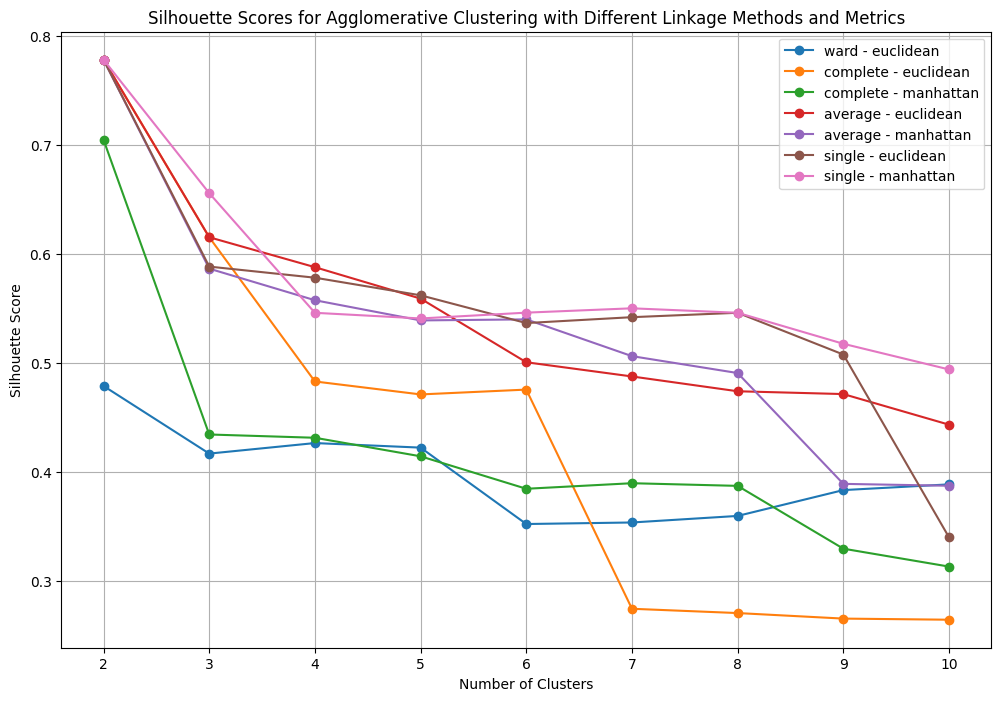

Best Silhouette Score: 0.7778304552462237
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [143]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

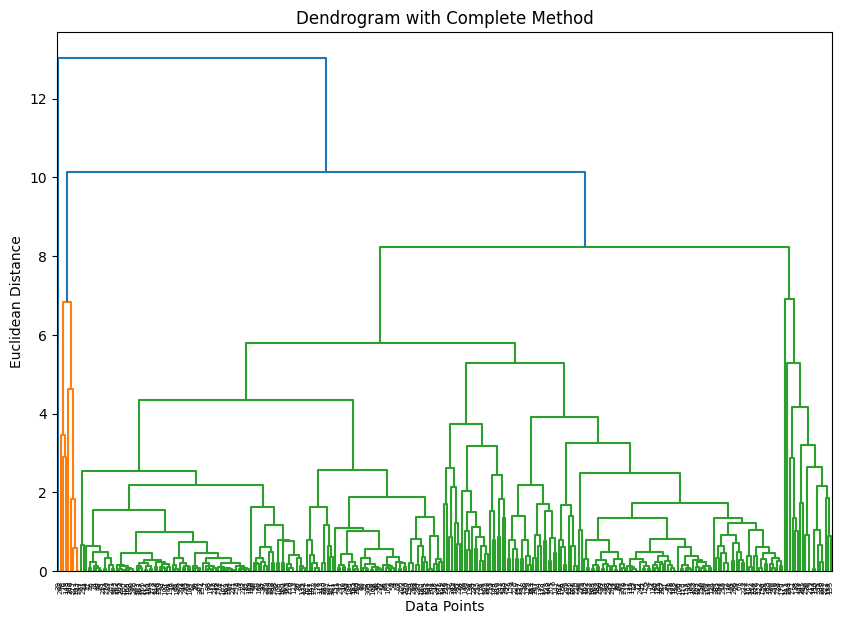

In [144]:
# Best Model
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

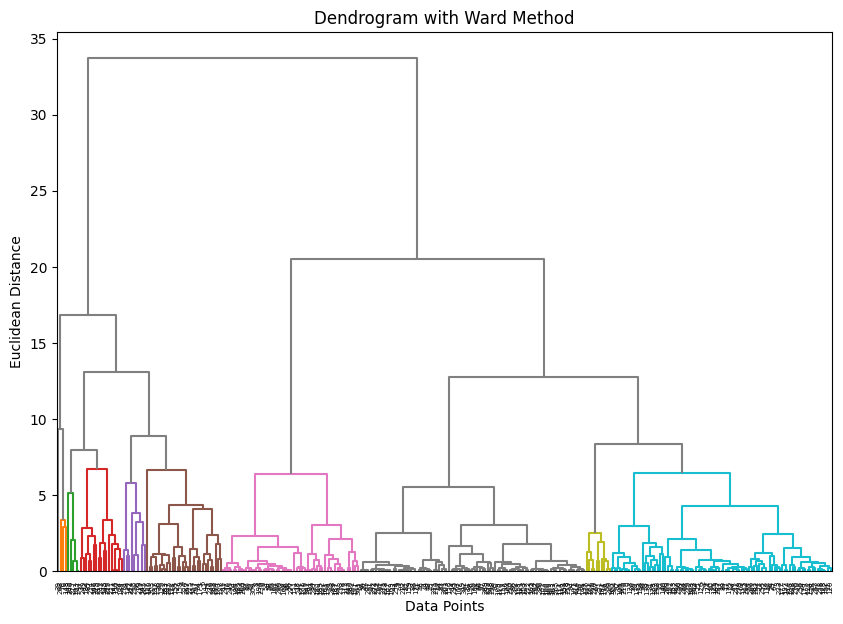

In [145]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [146]:
# Hierarchical Clustering
# Model 1 : Best Combination Parameter
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [147]:
# Evaluation Model 1
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7778304552462237


In [148]:
# Model 2: Ward linkage
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_ward = agglo_ward.fit_predict(df_scaled)

# Evaluate Model 2
ss_ward = silhouette_score(df_scaled, y_hc_ward)
print(f"Silhouette Score for Ward linkage: {ss_ward}")

Silhouette Score for Ward linkage: 0.4788670448216803


## Dendogram Visualization for Hierarchical Clustering Model

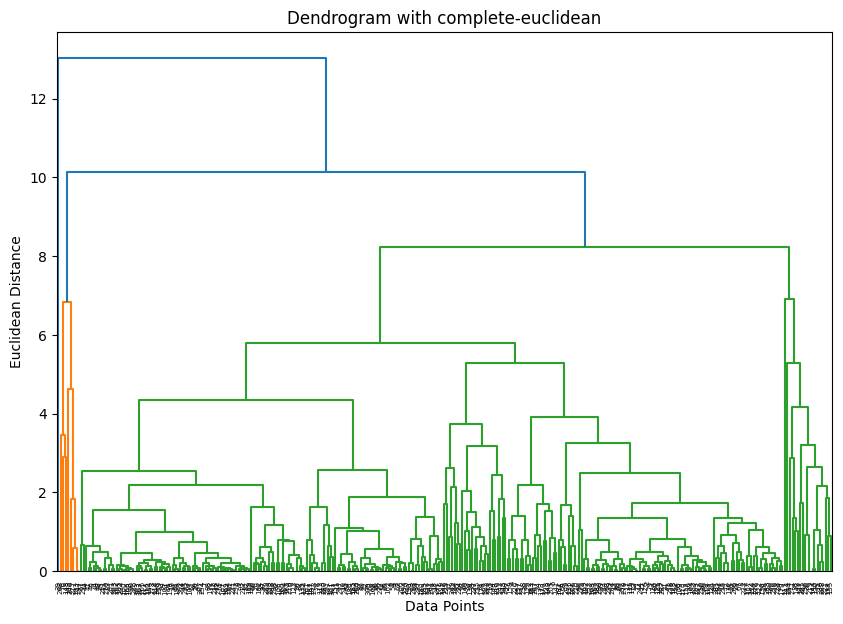

In [149]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

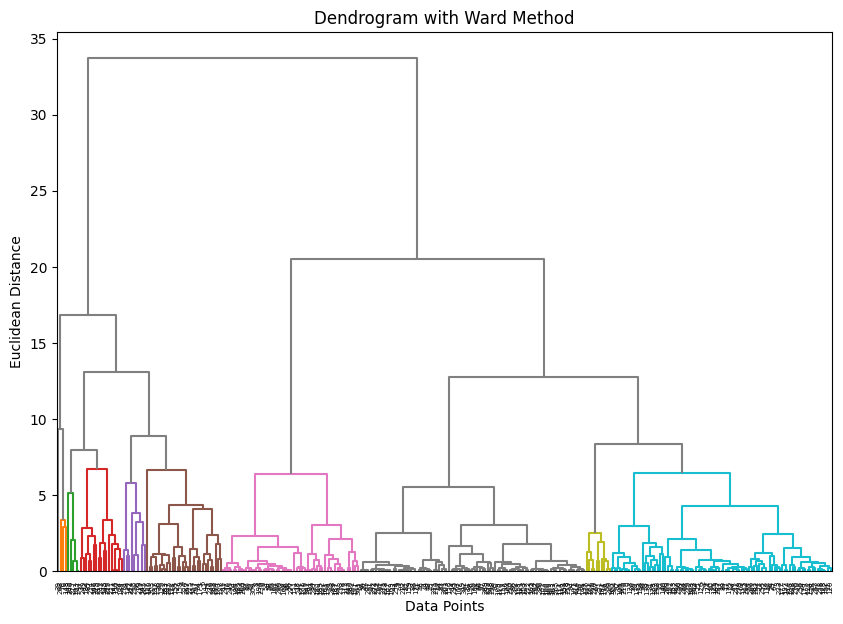

In [150]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [151]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


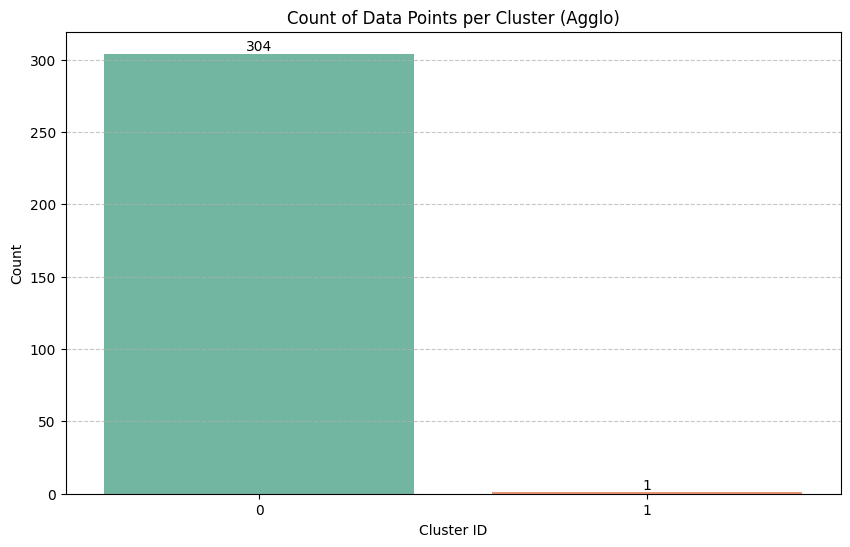

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

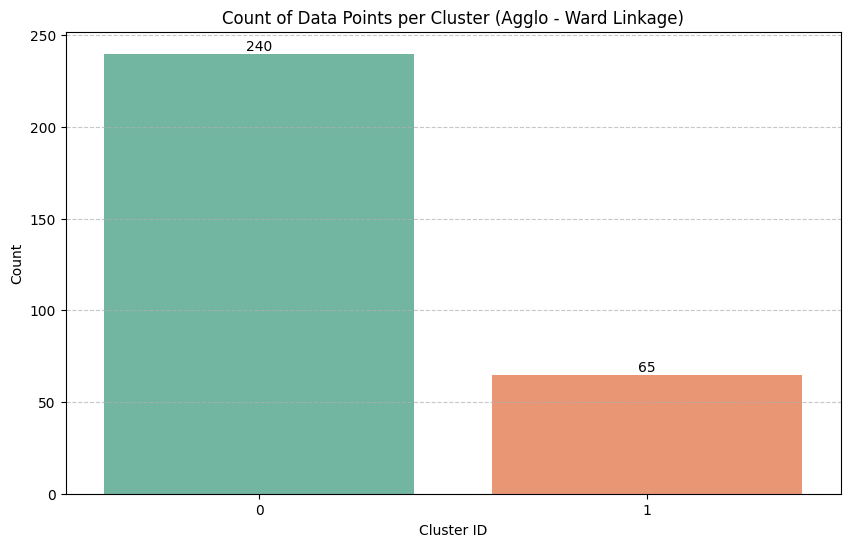

In [153]:
# Add the cluster labels from the Ward linkage model to the original data for comparison
df['Agglo_Ward'] = y_hc_ward

# Get the counts of each cluster in the 'Agglo_Ward' column of df
cluster_counts_ward = df['Agglo_Ward'].value_counts().sort_index()

# Create a bar plot for Ward linkage clusters
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_ward.index, y=cluster_counts_ward.values, hue=cluster_counts_ward.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo - Ward Linkage)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Interpretation: Which method gives more meaningful segmentation?

When comparing the results of the two hierarchical clustering models:

*   **Complete Linkage (Optimal Silhouette Score):** While this method achieved the highest silhouette score (0.778) with 2 clusters, the resulting clusters are highly imbalanced (304 data points in Cluster 0 and 1 in Cluster 1). This suggests that while the single data point in Cluster 1 is very distinct, the majority of the data is not well-separated into two meaningful groups by this method and number of clusters. This might be useful for identifying outliers but not for broader market segmentation.

*   **Ward Linkage (Lower Silhouette Score):** The Ward linkage method with 2 clusters resulted in a more balanced distribution of data points (240 in Cluster 0 and 65 in Cluster 1). Although the silhouette score (0.479) is lower than the complete linkage model, this distribution suggests a more meaningful segmentation of the dataset into two distinct groups that are more representative of potential market segments.

**Conclusion:**

Despite having a lower silhouette score, the **Ward linkage method provides a more meaningful segmentation** of the property data into two clusters. The more balanced distribution allows for a better understanding of the characteristics of two larger groups of properties within the market, which is more valuable for developing targeted managerial and business strategies compared to a segmentation that primarily identifies a single outlier. Further exploration with the Ward method and a different number of clusters might reveal even more granular and meaningful segments.

## Statistical Summary for each cluster

In [156]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah': ['mean', 'median'],
    'Luas Bangunan': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai ': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah        Luas Tanah        Luas Bangunan         \
               mode count        mean median          mean median   
cluster                                                             
0         Citraland   304  226.490132  162.5    265.789474  200.0   
1            Gubeng     1  600.000000  600.0    600.000000  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai          \
                mean median               mean median            mean median   
cluster                                                                        
0           4.253289    4.0           3.328947    3.0        1.842105    2.0   
1           7.000000    7.0           5.000000    5.0        1.000000    1.0   

        Area Category       Lebar Jalan Depan Rumah       Posisi Rumah        \
                 mode count                    mode count         mode count   
cluster                                                                        
0            Standard   304               1-2 Mobil   304     Standard   304   
1            Standard     1               1-2 Mobil     1     Standard     1   

        Arah Hadap Rumah        
                    mode count  
cluster                         
0                  Utara   304  
1                  Barat     1

In [157]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_ward).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah': ['mean', 'median'],
    'Luas Bangunan': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai ': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah        Luas Tanah        Luas Bangunan         \
               mode count        mean median          mean median   
cluster                                                             
0         Citraland   240  148.308333  133.0    179.995833  164.5   
1          Kenjeran    65  520.907692  450.0    587.707692  570.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai          \
                mean median               mean median            mean median   
cluster                                                                        
0           3.800000    4.0           2.845833    3.0        1.816667    2.0   
1           5.969231    6.0           5.138462    5.0        1.923077    2.0   

        Area Category       Lebar Jalan Depan Rumah       Posisi Rumah        \
                 mode count                    mode count         mode count   
cluster                                                                        
0            Standard   240               1-2 Mobil   240     Standard   240   
1             Premium    65               1-2 Mobil    65     Standard    65   

        Arah Hadap Rumah        
                    mode count  
cluster                         
0                  Utara   240  
1                  Barat    65

## Managerial Interpretation and Potential Business Implications (Ward Linkage)

Based on the Ward linkage clustering analysis, two distinct clusters have been identified with a more balanced distribution compared to the complete linkage method. Analyzing the statistical summary for each cluster provides insights into the characteristics of properties within these more balanced segments.

## **Cluster 0 (n=240)**

Profil: This cluster represents a large segment of properties. From the statistical summary of the Ward linkage clusters, these properties tend to have lower average and median 'Luas Tanah' and 'Luas Bangunan', and lower average and median 'Harga Penawaran' compared to Cluster 1. The most frequent 'Area Category' is likely "Standard" or "Below Standard".

Makna: This segment likely represents the more affordable or standard properties in the market.

Strategi:

*   Focus on marketing channels that reach a wider audience looking for value properties.
*   Implement competitive pricing strategies and highlight affordability.
*   Emphasize practicality, number of rooms/bathrooms suitable for average families.
*   Consider promotions or packages that add value without significantly increasing cost.

Fokus KPI: Sales volume, market share in the affordable segment, customer acquisition cost.

## **Cluster 1 (n=65)**

Profil: This cluster represents a smaller but significant segment of properties. Based on the statistical summary of the Ward linkage clusters, these properties tend to have higher average and median 'Luas Tanah' and 'Luas Bangunan', and significantly higher average and median 'Harga Penawaran' compared to Cluster 0. The most frequent 'Area Category' is likely "Premium" or "Sangat Premium".

Makna: This segment likely represents the higher-end or premium properties in the market.

Strategi:

*   Target marketing towards higher-income demographics and luxury property seekers.
*   Highlight the size, features, location, and potential for appreciation of these properties.
*   Utilize exclusive marketing channels and personalized sales approaches.
*   Emphasize the lifestyle and status associated with owning properties in this segment.

Fokus KPI: Revenue from high-value sales, average sale price, customer satisfaction for premium buyers.

**Note:** To fully leverage these interpretations, it's important to refer back to the statistical summary generated for the Ward linkage clusters (`cluster_summary` based on `y_hc_ward`) to confirm the specific average, median, and mode values for each feature within these two clusters.

## Managerial Interpretation and Potential Business Implications

Based on the clustering analysis, two distinct clusters have been identified. Analyzing the statistical summary for each cluster provides insights into the characteristics of properties within each segment.

## **Cluster 0 (n=304)**

Profil: This cluster represents the majority of properties in the dataset. Based on the statistical summary, these properties generally have average 'Luas Tanah' and 'Luas Bangunan', a range of 'Jumlah Kamar' and 'Jumlah Kamar Mandi', and a variety of 'Harga Penawaran'. The most frequent 'Area Category' is "Standard", and "Standard" is also the most common 'Posisi Rumah' and 'Lebar Jalan Depan Rumah' is typically "1-2 Mobil".

Makna: This is the core market segment, consisting of standard properties with average characteristics.

Strategi:

*   Focus on broad marketing channels to reach a wide audience interested in standard properties.
*   Competitive pricing strategies based on the average 'Harga Penawaran' for this cluster.
*   Highlight standard features and practical aspects of these properties.
*   Consider minor renovations or upgrades to increase appeal within the "Standard" category.

Fokus KPI: Sales volume, conversion rate for standard properties, time on market.

## **Cluster 1 (n=1)**

Profil: This cluster contains a single property with a large 'Luas Tanah' and 'Luas Bangunan' and a high 'Harga Penawaran'.

Makna: This represents a unique or outlier property, likely a high-value or specialized property that does not fit the characteristics of the main cluster.

Strategi:

*   Develop a highly targeted marketing strategy focusing on high-net-worth individuals or specific niche buyers.
*   Emphasize the unique features, size, and potential value of this property.
*   Consider private viewings and personalized sales approaches.

Fokus KPI: Successful sale of the unique property, achieving target price.

**Note:** With only one property in Cluster 1, the statistical measures (like standard deviation) are not meaningful for this cluster. The primary insight from this cluster is the identification of a property that is significantly different from the rest of the dataset. The clustering with Ward linkage provided a more balanced distribution of properties across clusters, which might offer more detailed segments for analysis.